In [1]:
library(latex2exp)

# Daniele Mellino 2013373

## Exercise 1

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.<br>
A young UniPD startUp has developed an innovative method of screening.  During the qualification phase, a random sample of n= 75 patients known to have the disease is screened using the new method.

1. What is the probability distribution of y, the number of times the new method fails to detect the disease ?
2. On the n= 75 patients sample, the new method fails to detect the disease in y= 6 cases.  What is the frequentist estimator of the failure probability of the new method ?
3. Setup a bayesian computation of the posterior probability, assuming a beta distribution with meanvalue 0.15 and standard deviation 0.14.  Plot the posterior distribution for y, and mark on the plot the mean value and variance.
4. Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way
5. Perform the same hypothesis test in the classical frequentist way.

#### solution:
#### 1 What is the probability distribution of y?
The probability distribution of the number of times the new method fails is a binomial: 

$$ P(y|p,n,M)= \binom{n}{y}p^y(1-p)^{n-y} $$

where p is the probability of failure.

#### 2 What is the frequentist estimator of the failure probability of the new method ?
In the frequentist case an unbiased estimator of y is: $\dfrac{y}{n}$
#### 3 Plot the posterior distribution for y, and mark on the plot the mean value and variance.

One need to evaluate the parameters of the beta distribution, $\alpha$ and $\beta$. 
Knowing that the expected value,$\mu = 0.15$ and the variance,$\sigma^2 = 0.14^2$ one have to solve the system:

$$
  \begin{cases} 
                \mu=\frac{\alpha}{\alpha + \beta}\\
                \sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
  \end{cases}
$$

Doing some math, let's call $A= \frac{\mu(1-\mu)}{\sigma^2} -1$, the solution is:

$$
  \begin{cases} 
                \alpha =A\mu\\
                \beta=A(1-\mu)
  \end{cases}
$$

In the code below I use the fact that the beta prior is the conjugate prior of the binomial distribution.


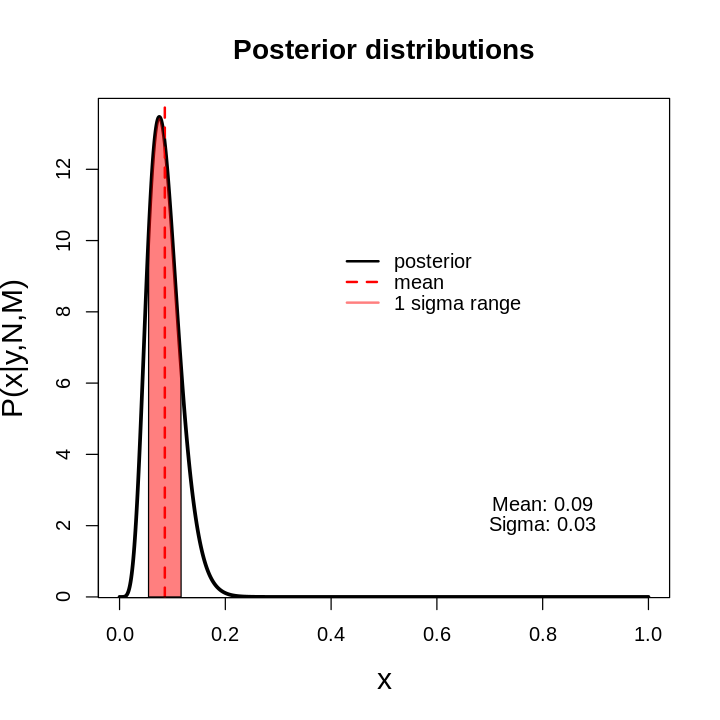

In [2]:
#experimental values
N<-75;y<-6

#finds alpha and beta
mu<- 0.15 ; sigma2<- 0.14^2
A<- mu*(1-mu)/sigma2
alpha<- A*mu ; beta<- A*(1-mu)

#define Posterior:

#prior<- function(x) dbeta(x,alpha,beta)
alphap<-alpha+y
betap<- beta+N-y
post<- function(x) dbeta(x, alphap,betap) 

x_pos<- seq(0,1,0.001)

#compute posterior, mean and var
poste<-post(x_pos)
mean_p<- alphap/(alphap+betap)
var_p<- (alphap*betap)/((alphap+betap)^2 *(alphap+betap+1))

#plots
options(repr.plot.width=6,repr.plot.height=6)

plot(x_pos,poste,
     type='l', col='black',
     xlab='x', ylab='P(x|y,N,M)',
     cex.lab=1.5,cex.main=1.4,
     main="Posterior distributions",
     lty=1, lwd=3,ylim=c(0.5,max(poste)))
abline(v = mean_p, lty=2,lwd=2,col='red')

varm <-mean_p-sqrt(var_p)
varp <- mean_p+sqrt(var_p)
x <- c(varm,x_pos[x_pos>varm & x_pos<varp],varp)
y <- c(0,poste[which(x_pos> varm & x_pos<varp)],0)

polygon(x = x, y = y, col = adjustcolor('red',alpha.f=0.5)  )

legend(0.4,10,
       legend=c("posterior", "mean","1 sigma range"),
       col=c('black','red',adjustcolor('red',alpha.f=0.5)),
       lty=c(1,2),lwd=2,inset=0.01,
       box.lty=0,cex=1)

text(0.8, 2, paste("Sigma:", round(sqrt(var_p),2)))
text(0.8, 2.6, paste("Mean:", round(mean_p,2)))



#### 4 Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way

In [3]:
# compute the posterior probability of the null hyphotesis assuming uniform prior on y
y<-6;N<-75;conf<-0.05

#probability
p0<- integrate(post, lower=0.15, upper=1)$value

if (p0<conf){ 
    print("We accept the new hypothesis: the new test is better with 5% level of significance")
}    else{
    print("we reject the new hyphotesis with 5% level of significance")
}


[1] "We accept the new hypothesis: the new test is better with 5% level of significance"


#### 5 Perform the same hypothesis test in the classical frequentist way.
$H_0$: $y = 15$ <br>
$ H_1$: $y < 15$ 

I' m doing a lower tailed test therefore the p-value is simply the CDF of the test statistic under the NULL hypotesis.

[1] "We have not enough evidence to reject the NULL hypothesis"


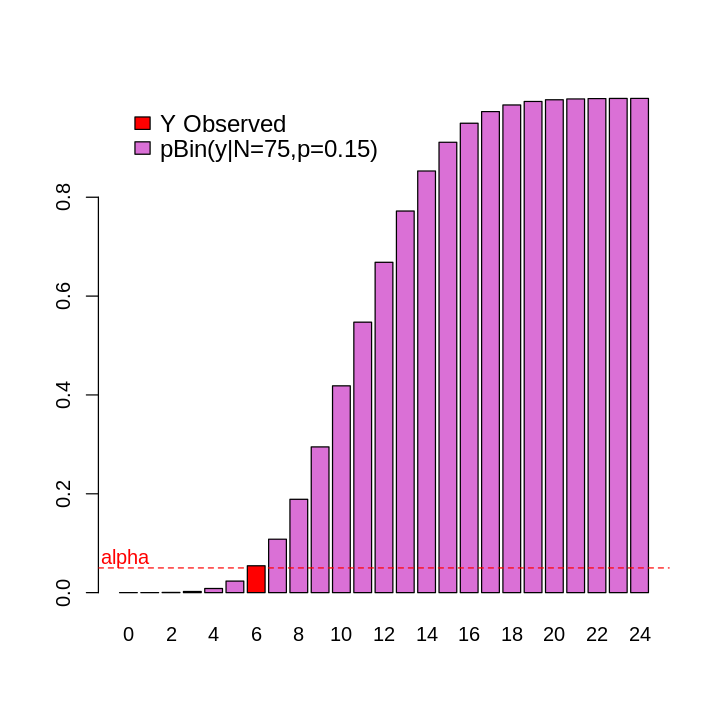

In [4]:
#classical frequentist way

p0 <-0.15;y<- 6;N<- 75
plot_max <- 24
cols <- rep('orchid', plot_max+1) 
cols <- replace(cols, y+1, 'red')

ys <- seq(0,plot_max,1)

#graphical 
barplot(pbinom(ys, N, p0), names.arg=ys, col=cols, angle=60)
legend(0,1., legend=c("Y Observed",  "pBin(y|N=75,p=0.15)"),
       bty='n', fill=c('red', 'orchid'), x.intersp=0.5, cex=1.2)

abline(h=conf, col="red",lty=2)
text(0.5,conf+0.02,"alpha", col="red")

#analytical:
p_value <- pbinom(y, N, p0)
if (p_value<=conf){ print(" We reject the NULL hypothesis consequentially we accept the new one")
                  }else {print("We have not enough evidence to reject the NULL hypothesis")}

## Exercise 2
Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician.  He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population.  In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.<br>
Considering the following two sets of observations taken over a fixed large time interval in two different corps:


n1 observations={ 109, 65, 22, 3, 1, 0 }  

n2 observations= {144, 91, 32, 11, 2, 0 }

1. assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time.  Determine the posterior mean, median and variance, and compute the 95% credibility interval.

2. assuming now a Jeffreys’ prior,

$$g(\lambda) \propto \frac{1}{\lambda}, \text{with} \; \lambda>0$$

compute and  plot  the  posterior  distribution  for λ,  the  death  rate  over  the  measurement  time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.



In [5]:
# I use the functions used in the previous set of exercises


CL_linear<- function(x,post, ci=0.95){
    d<-post * (x[2]-x[1])
    conf<-(1-ci)/2 #double tail
    
    for(i in 1:(length(d)-1)){
        #left tail
        if( sum(d[1:i])<conf & sum(d[1:(i+1)])>conf ){
            #interp coeff
            m<- (sum(d[1:(i+1)])-sum(d[1:i]) )/(x[i+1]-x[i])
            q<- sum(d[i:1])
            #left bound:
            a<- (conf-q)/m+x[i] 
        
        }
        
        #right tail
        if(sum(d[1:i])<(ci+conf) & sum(d[1:(i+1)])>(ci+conf)) {
            #interp coeff
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            #right bount
            b <- (1-conf-q)/m+x[i]
        }
        
    }
    
    return(c(a,b))
    
}

#function that plot a posterior with the confidence interval
plot_CI<-function(p,post,cmm,max,name,col=c("red","blue"),bayes=FALSE,xlab=expression(alpha)){
    
    plot(p, post,
         xaxs='r', yaxs='i',
         col=col[1], type='l',
         ylim=c(0,max(post)+0.01),
         main = paste("Plot of ",name," Posterior distribution function"),
         lwd = 3, cex.lab=1,cex.main=1,
         xlab=xlab, ylab='Density',
        )

    x <- c(cmm[1],p[p>cmm[1] & p<cmm[2]],cmm[2])
    y <- c(0,post[which(p>cmm[1] & p<cmm[2])],0)
    polygon(x = x, y = y, col = adjustcolor(col[1],alpha.f=0.5)  )

    abline(v=cmm[1], lty=2,col=col[2])
    abline(v=cmm[2], lty=2,col=col[2])


    if(bayes==FALSE){
        abline(v=max, lty=2,col=col[2])
        text(max, par("usr")[4] - 0.08, labels = TeX(sprintf("$MAX$= %0.2f",max)), pos=1, cex=1.1, col=col[2], xpd=TRUE)
        }
    
    if(bayes==TRUE){
        abline(v=max, lty=2,col='blue')
        text(max, 2, labels = TeX(sprintf("$p0$= %0.2f",max)), pos=1, cex=1.1, col='blue', xpd=TRUE)

    }
    text(cmm[1], par("usr")[4] , labels = TeX(sprintf("$a$= %0.2f",cmm[1])), pos=1, cex=1.1, col=col[2], xpd=TRUE)
    text(cmm[2], par("usr")[4] , labels = TeX(sprintf("$b$= %0.2f",cmm[2])), pos=1, cex=1.1, col=col[2], xpd=TRUE)

    grid()
    
    
}

#new functions


posterior<- function(x,data,type='U',plot=FALSE){
    alpha=sum(data)
    beta=length(data)

    if(type=='U'){
        alpha=alpha+1
    }else if(type=='J'){
        alpha=alpha+0.5
    } else {stop("Insert a valid type of prior")}
        
    if(plot==FALSE) return(rgamma(x,alpha,beta))
    if(plot==TRUE)  return(dgamma(x,alpha,beta))
}

numerics<-function(x,n,type='U'){
    post<-posterior(x,n,type)
    lista<- c(mean(post),  median(post), var(post))
}


In [6]:
#data
n1=c( rep(0,109), rep(1,65),rep(2, 22),rep(3,3), rep(4,1))
n2=c(rep(0,144), rep(1,91), rep(2,32),rep(3,11), rep(4,2))
#simulation params
N<-10000 
x<-seq(0,1,length.out=N)


#### 1. Assuming a Flat prior

Set 1:
mean  -  median  -  variance
0.6146543 0.6128518 0.003114753 
Set 2:
mean  -  median  -  variance
0.7036431 0.7024155 0.002452922
(flat) 95% C.I, set 1, is : [0.511, 0.728]
(flat) 95% C.I., set 2, is: [0.609, 0.805]

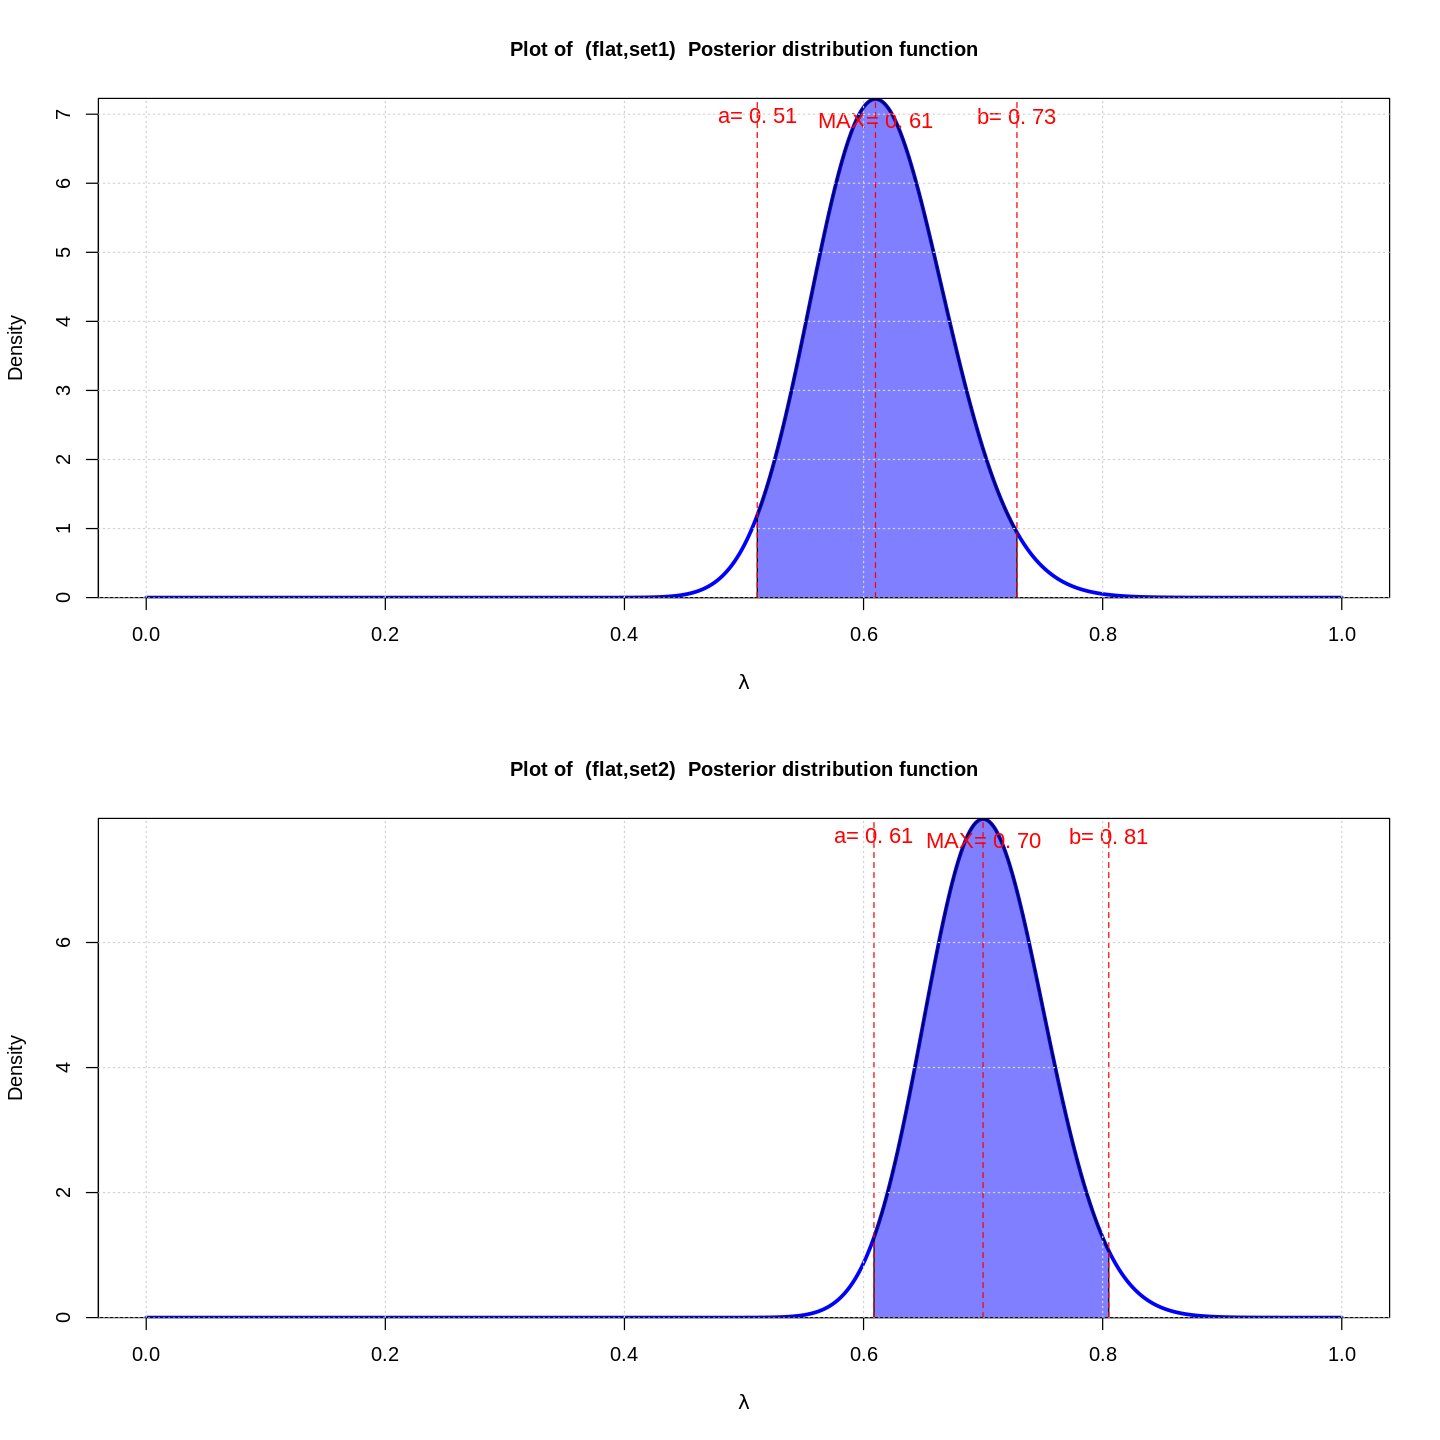

In [7]:
#compute mean median and variance numerically

cat("Set 1:\nmean  -  median  -  variance\n")

numerics_U.1<- numerics(x,n1)
cat(numerics_U.1,"\nSet 2:\nmean  -  median  -  variance\n")
numerics_U.2<- numerics(x,n2)
cat(numerics_U.2)

#compute 95% credibility intervals:
posterior_u1<-posterior(x,n1,plot=TRUE)
posterior_u2<-posterior(x,n2,plot=TRUE)
cl_u1<-CL_linear(x,posterior_u1 )
cl_u2<-CL_linear(x, posterior_u2)

cat("\n(flat) 95% C.I, set 1, is : [", round(cl_u1[1],3), ", ", round(cl_u1[2],3), "]", "\n", sep="")
cat("(flat) 95% C.I., set 2, is: [", round(cl_u2[1],3), ", ", round(cl_u2[2],3), "]",       sep="")

#plot
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,1)) 

max_u1<- x[which.max(posterior_u1)]
plot_CI(x,posterior_u1,cl_u1,max_u1,"(flat,set1)",c("blue","red"),xlab=expression(lambda))

max_u2<- x[which.max(posterior_u2)]
plot_CI(x,posterior_u2,cl_u2,max_u2,"(flat,set2)",c("blue","red"),xlab=expression(lambda))




#### 2. Assuming a Jeffrey's Prior

Set 1:
mean  -  median  -  variance
0.6125866 0.6114096 0.00309173 
Set 2:
mean  -  median  -  variance
0.7016141 0.7004065 0.00247799
(flat) 95% C.I, set 1, is : [0.509, 0.726]
(flat) 95% C.I., set 2, is: [0.607, 0.803]

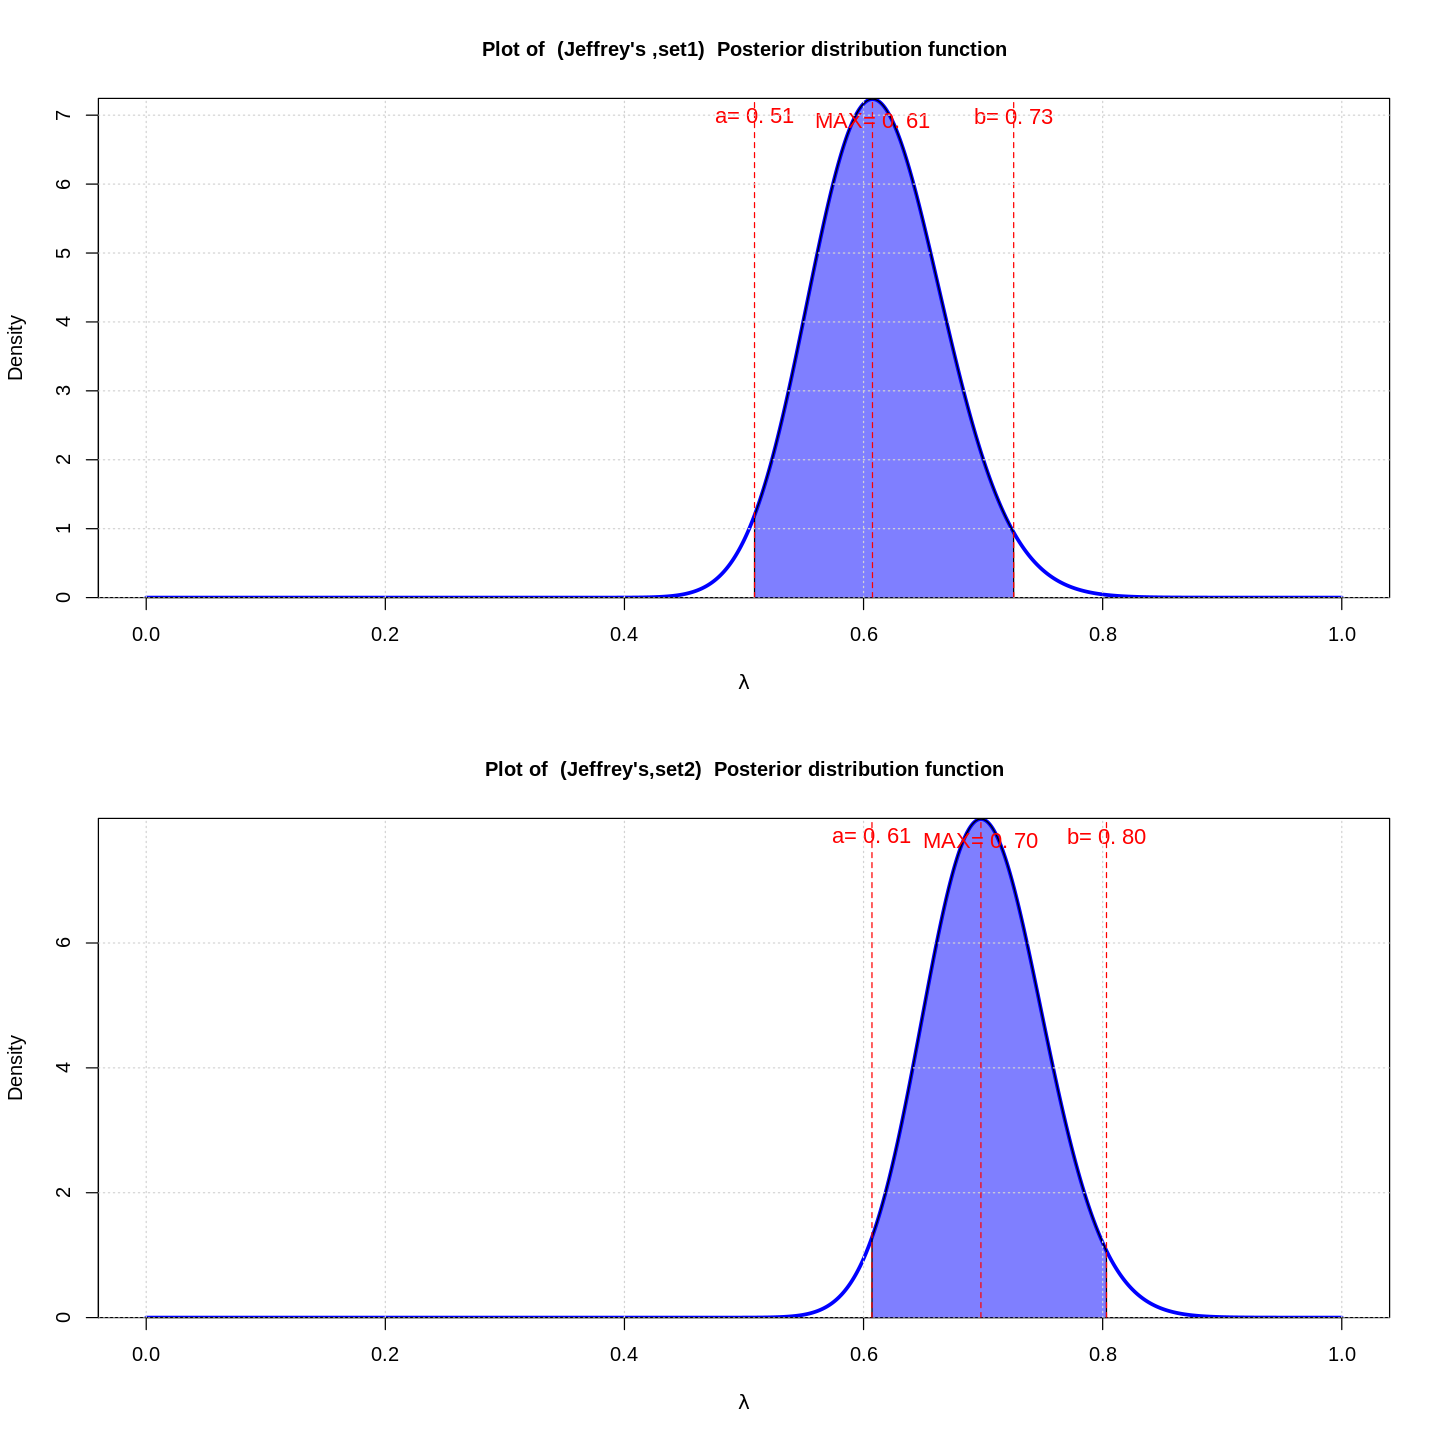

In [8]:
#compute mean median and variance numerically

cat("Set 1:\nmean  -  median  -  variance\n")

numerics_J.1<- numerics(x,n1,type='J')
cat(numerics_J.1,"\nSet 2:\nmean  -  median  -  variance\n")
numerics_J.2<- numerics(x,n2,type='J')
cat(numerics_J.2)

#compute 95% credibility intervals:
posterior_j1<-posterior(x,n1,type='J',plot=TRUE)
posterior_j2<-posterior(x,n2,type='J',plot=TRUE)
cl_j1<-CL_linear(x,posterior_j1 )
cl_j2<-CL_linear(x, posterior_j2)

cat("\n(flat) 95% C.I, set 1, is : [", round(cl_j1[1],3), ", ", round(cl_j1[2],3), "]", "\n", sep="")
cat("(flat) 95% C.I., set 2, is: [", round(cl_j2[1],3), ", ", round(cl_j2[2],3), "]",       sep="")

#plot
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,1)) 

max_j1<- x[which.max(posterior_j1)]
plot_CI(x,posterior_j1,cl_j1, max_j1,"(Jeffrey's ,set1)",c("blue","red"),xlab=expression(lambda))

max_j2<- x[which.max(posterior_j2)]
plot_CI(x,posterior_j2,cl_j2,max_j2,"(Jeffrey's,set2)",c("blue","red"),xlab=expression(lambda))



## Exercise 3
A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n= 116 samples were taken from streams having a high environmental impact on pandas.  Out of these, y= 11 had a high bacter X level.<br>

Indicating with p the probability that a sample of water taken from the stream has a high bacter X level.

1. find the frequentist estimator for p
2. using a Beta(1,10) prior for p, calculate the posterior distribution P(p∣∣y)
3. find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
4. test the hypotesis

$$H_0 : p=0.1 \; \text{versus} \; H_1 : p\neq0.1 $$

at 5% level of significance with both the frequentist and bayesian approach

a new measurement, performed one month later on n= 165 water samples, gives y= 9 high bacter X level.

5. find the frequentist estimator for p
6. find a bayesian estimator for p, assuming both a Beta(1,10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.
7.  find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
8. test the hypotesis 


$$H_0 : p=0.1 \; \text{versus} \; H_1 : p\neq0.1 $$

at 5% level of significance with both the frequentist and bayesian approach

#### 1. find the frequentist estimator for p

I assume that the presence of a high bacter level in a sample is a Bernoulli process. Therefore the frequentist estimator for p is $p_F =\dfrac{y}{n}$

In [9]:
N <- 116 #n total
y <- 11 # high level bacteria

pf <- y/N

cat(paste("Frequentist estimator: pf= ", round(pf,3)))


Frequentist estimator: pf=  0.095

#### 2. using a Beta(1,10) prior for p, calculate the posterior distribution P(p∣∣y)
As always here I use the fact that the beta function is the conjugate prior of the bernoulli process.

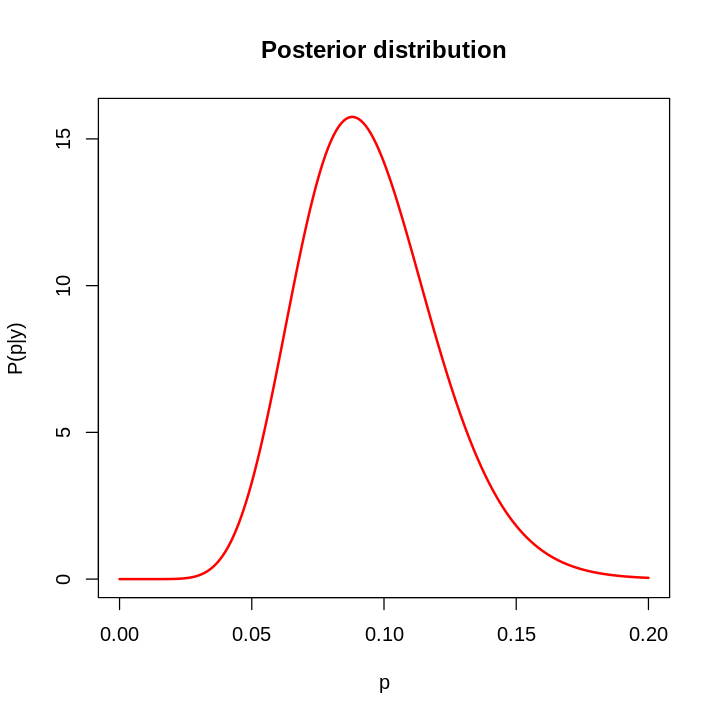

In [10]:
options(repr.plot.width=6,repr.plot.height=6)

alpha0 <- 1; beta0 <- 10 #prior params
alpha <- alpha0+y
beta <- beta0+N-y
x <- seq(0,0.2,0.001)
posterior0<- dbeta(x, alpha,beta)
plot (x, posterior0, type='l', col='red', lwd=2,
      main="Posterior distribution", xlab="p", ylab="P(p|y)")

#### 3. find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval 

    mean     -    variance
 0.09448819  -  0.0006684388
95% C.I, is : [0.05, 0.151]
95% C.I., is: [0.05, 0.151]

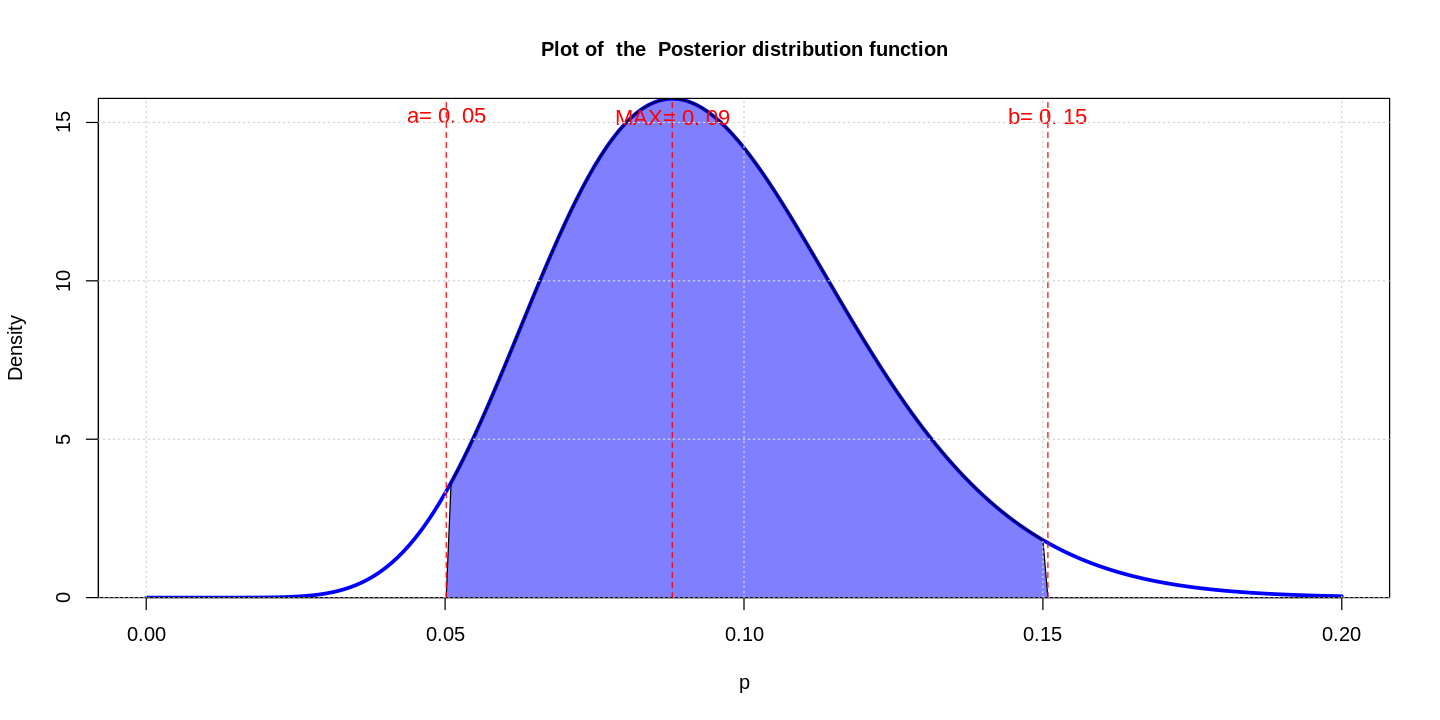

In [11]:
#compute mean and variance analytically


mean <- (alpha)/(alpha+beta) 
var <- alpha*beta/((alpha+beta)^2*(alpha+beta+1))
cat("    mean     -    variance\n", mean, " - ", var)

#compute 95% credibility intervals through quantile function:

cl_l <- qbeta(0.025, alpha,beta)
cl_h <- qbeta(0.975, alpha,beta)
cl<-c(cl_l,cl_h)

cat("\n95% C.I, is : [", round(cl[1],3), ", ", round(cl[2],3), "]", "\n", sep="")
cat("95% C.I., is: [", round(cl[1],3), ", ", round(cl[2],3), "]",       sep="")

#plot
options(repr.plot.width=12, repr.plot.height=6)

max<- x[which.max(posterior0)]
plot_CI(x,posterior0,cl, max,"the",c("blue","red"),xlab="p")


#### 4.  test the hypotesis in both frequentist and bayesian way.

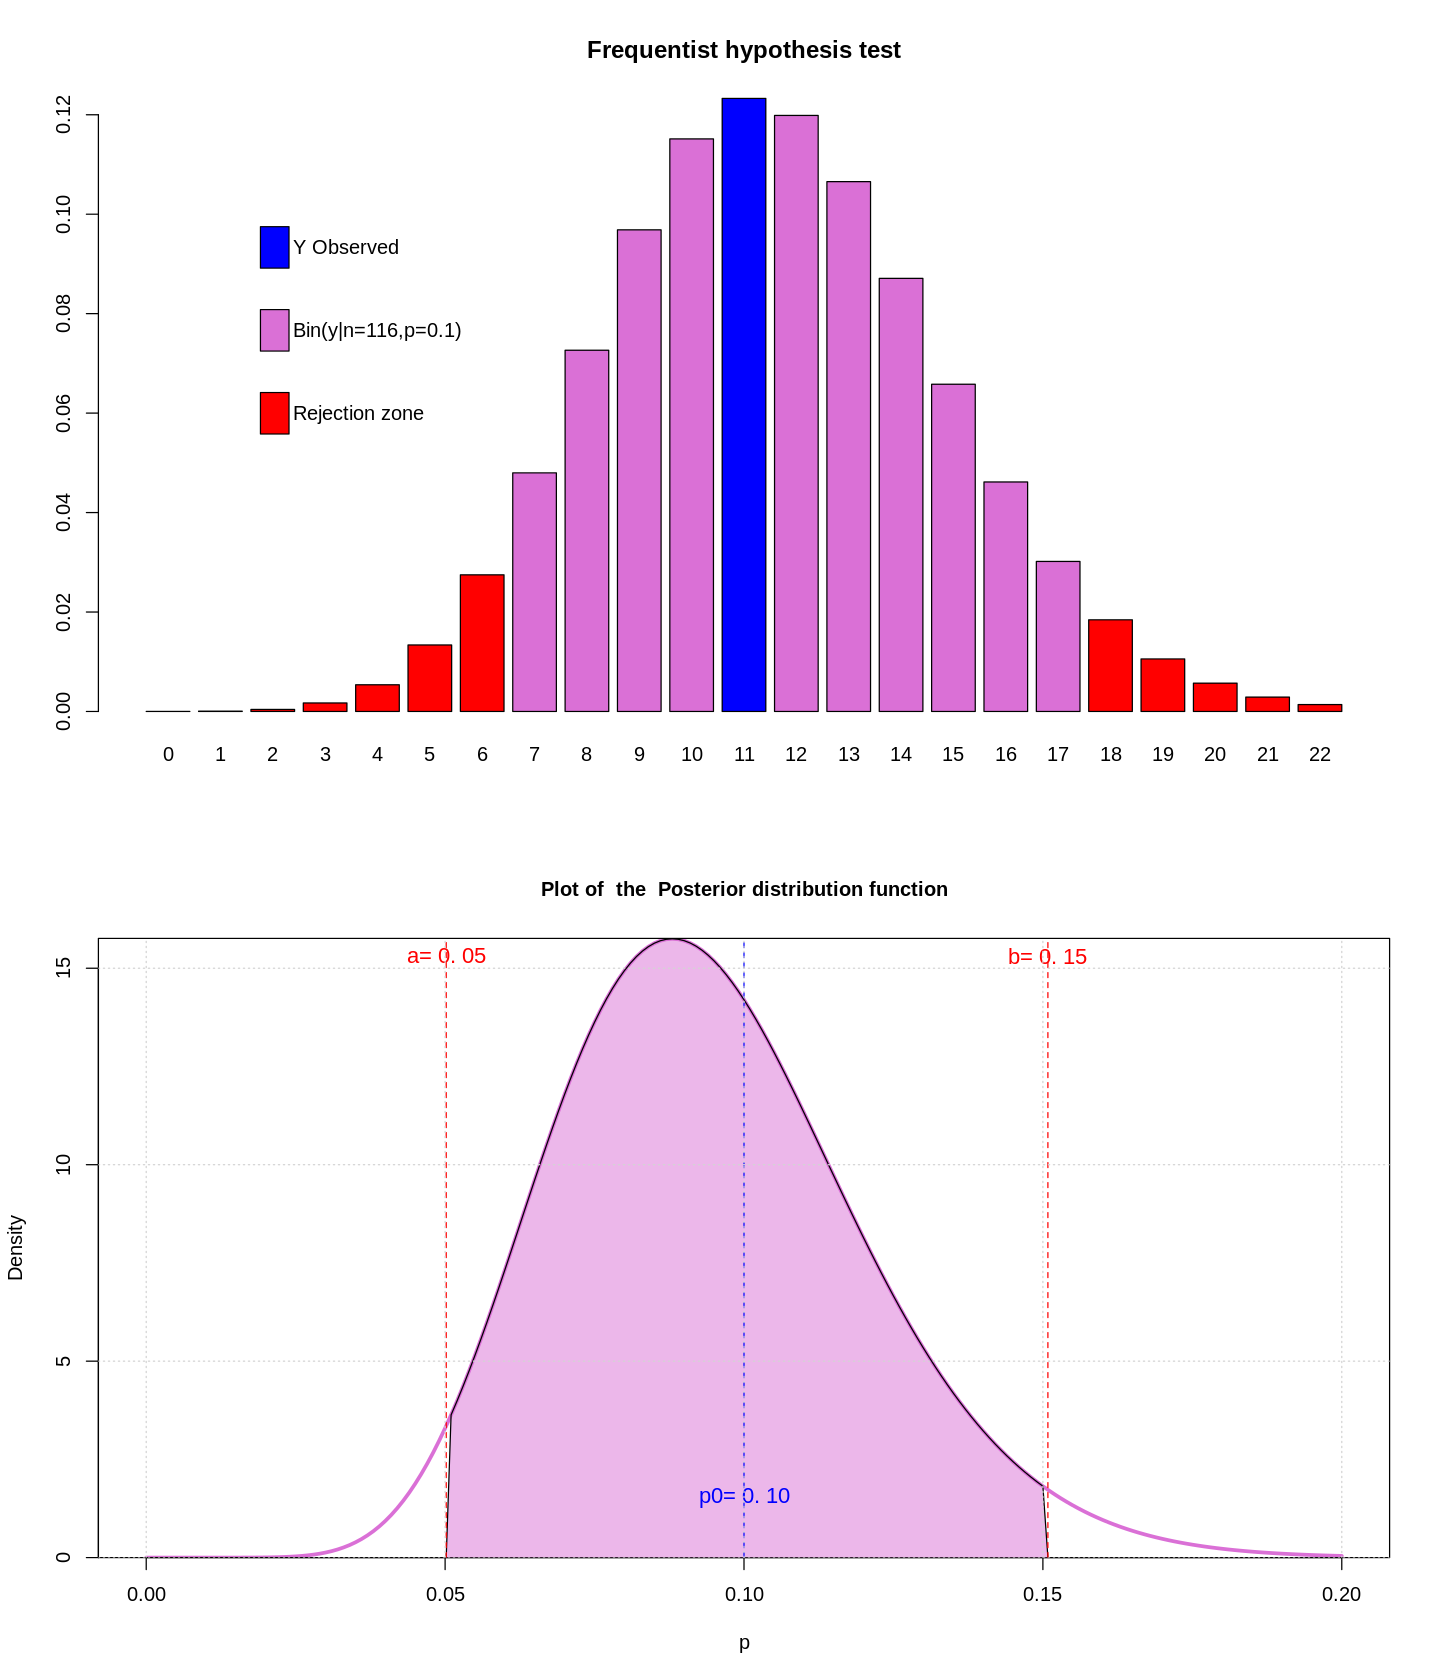

In [12]:
conf<-0.05; p0<- 0.1

rej_l<- qbinom(conf/2.,N , p0)
rej_r<- qbinom(1-conf/2., N, p0)

## frequentist approach: two tailed test

#visualization:
plot_max <- 22
columns <- rep('orchid', plot_max+1)
columns <- replace(columns, c(seq(1, rej_l+1,1), seq(rej_r+1, plot_max+1)), 'red')
columns <- replace(columns, y+1, 'blue')

options(repr.plot.width=12, repr.plot.height=14)
par(mfrow=c(2,1)) 

ys <- seq(0,plot_max,1)
barplot(dbinom(ys, N, p0), names.arg=ys,
        col=columns, angle=60,
        main='Frequentist hypothesis test')

legend(2,0.11, legend=c("Y Observed", "Bin(y|n=116,p=0.1)", "Rejection zone"),
       bty='n', fill=c('blue', 'orchid', 'red'), x.intersp=0.1 )


##bayesian approach
plot_CI(x,posterior0,cl, p0,"the",c("orchid","red"),bayes = TRUE,xlab="p")




As can be seen in the barplot above, in the frequentist approach we can not reject the null hypothesis, since $y=11$ fall into the acceptance region.<br>
Same story for the bayesian approach(assuming that prior) for which we can not reject the null hypothesis at 5% level of significance(p0 happens to be in the acceptance region).
#### 5. find the frequentist estimator for p
As before:

In [13]:
Nn <- 165 ;yn <- 9 
pf <- yn/Nn

cat(paste("Frequentist estimator: pf= ", round(pf,3)))


Frequentist estimator: pf=  0.055

#### 6. find a bayesian estimator for p, assuming both a Beta(1,10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.
As bayesian estimator I choose the mean of the posterior, since it is a beta distribution I can use the analytic form:

In [14]:
###Assuming prior : Beta(1,10)
estimation1<- (yn+1)/(Nn+1+10)
cat("Bayesian estimator for p (prior: Beta(1,10)):", estimation1)


### Assuming as prior the old posterior: Beta(alpha,beta)
estimation2<- (yn+alpha)/(Nn+beta+alpha)
cat("\nBayesian estimator for p (prior: old posterior:", estimation2)


Bayesian estimator for p (prior: Beta(1,10)): 0.05681818
Bayesian estimator for p (prior: old posterior: 0.07191781

#### 7. find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [15]:

computation<- function(alpha,beta,ci=0.95,name=''){
    #compute mean and variance analytically
    x <- seq(0,0.2,0.001)
    posterior00<- dbeta(x, alpha,beta)
    mean <- (alpha)/(alpha+beta) 
    var <- alpha*beta/((alpha+beta)^2*(alpha+beta+1))
    cat("    mean     -    variance\n", mean, " - ", var)

    #compute 95% credibility intervals through quantile function:

    cl_l <- qbeta((1-ci)/2, alpha,beta)
    cl_h <- qbeta(ci+(1-ci)/2, alpha,beta)
    cl<-c(cl_l,cl_h)

    cat("\n95% C.I, is : [", round(cl[1],3), ", ", round(cl[2],3), "]", "\n", sep="")
    cat("95% C.I., is: [", round(cl[1],3), ", ", round(cl[2],3), "]",       sep="")

    #plot
    options(repr.plot.width=12, repr.plot.height=6)

    max<- x[which.max(posterior00)]
    plot_CI(x,posterior00,cl, max,c("blue","red"),name = name)

    return(c(list(posterior00),list(cl) ))
}


 CASE with BETA PRIOR--------------
    mean     -    variance
 0.05681818  -  0.0003027677
95% C.I, is : [0.028, 0.095]
95% C.I., is: [0.028, 0.095]

 CASE with old measurement as PRIOR--------------
    mean     -    variance
 0.07191781  -  0.0002278008
95% C.I, is : [0.045, 0.104]
95% C.I., is: [0.045, 0.104]

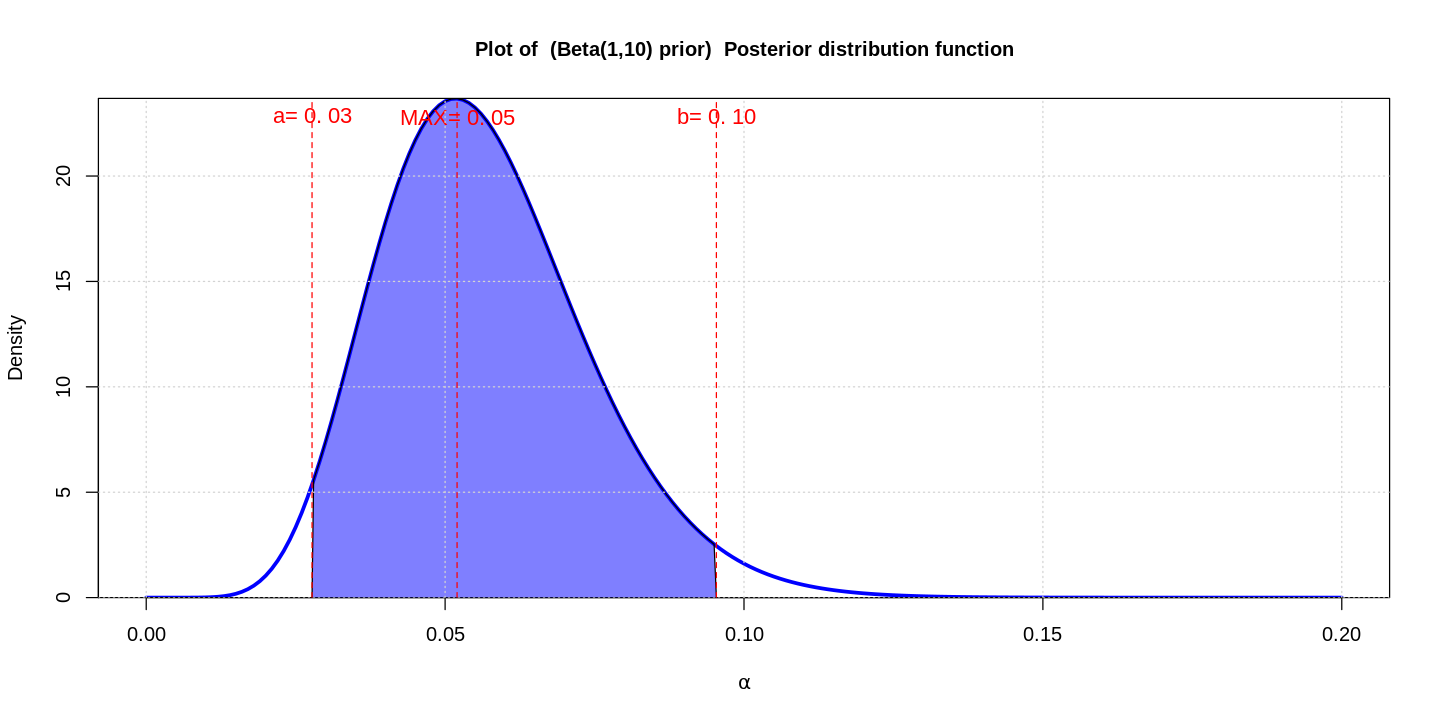

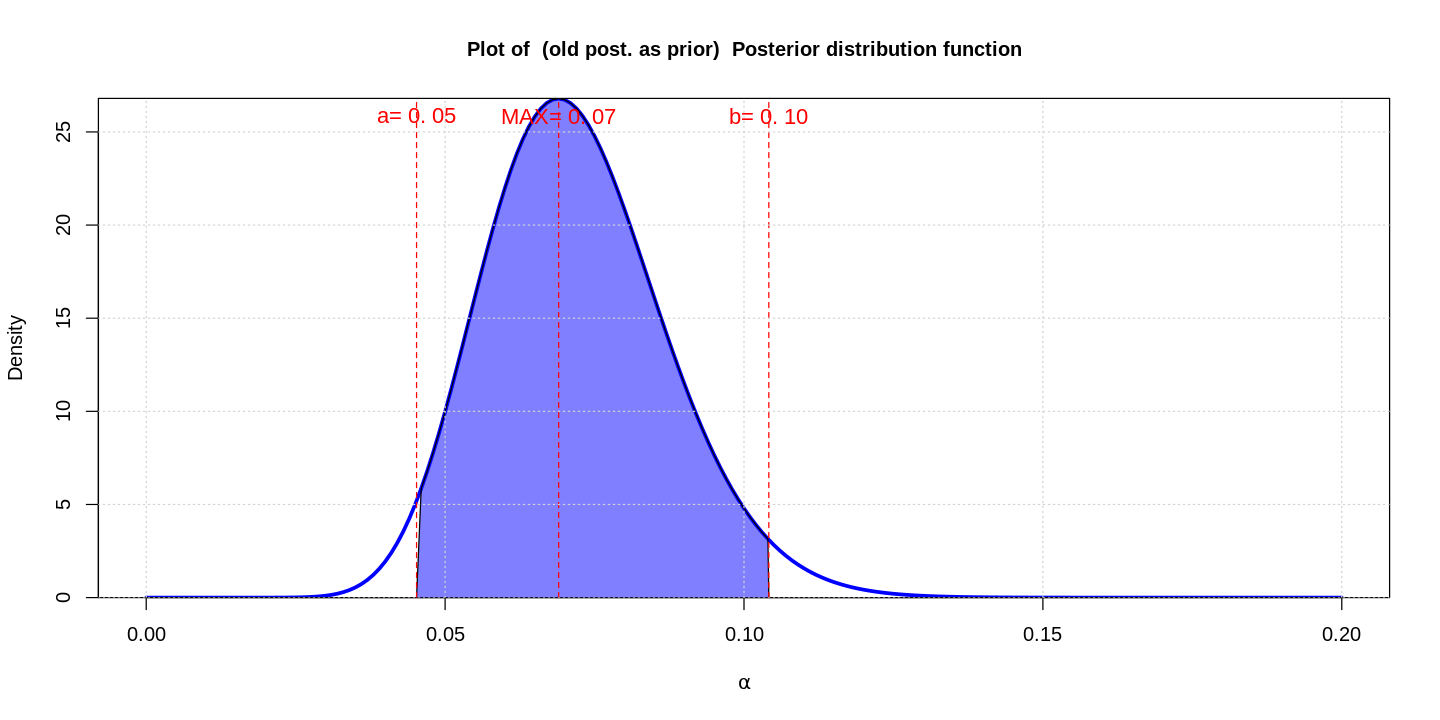

In [16]:
## case beta(1,10) prior:
alpha0 <- 1; beta0 <- 10 #prior params
alphan <- alpha0+yn
betan <- beta0+Nn-yn

cat("\n CASE with BETA PRIOR--------------\n")
b110<-computation(alphan,betan,name='(Beta(1,10) prior)')

#case old prior
alphao <- alpha+yn
betao <- beta+Nn-yn

cat("\n\n CASE with old measurement as PRIOR--------------\n")
bop<-computation(alphao,betao,name="(old post. as prior)")



#### 8.  test the hypotesis with both the frequentist and bayesian approach

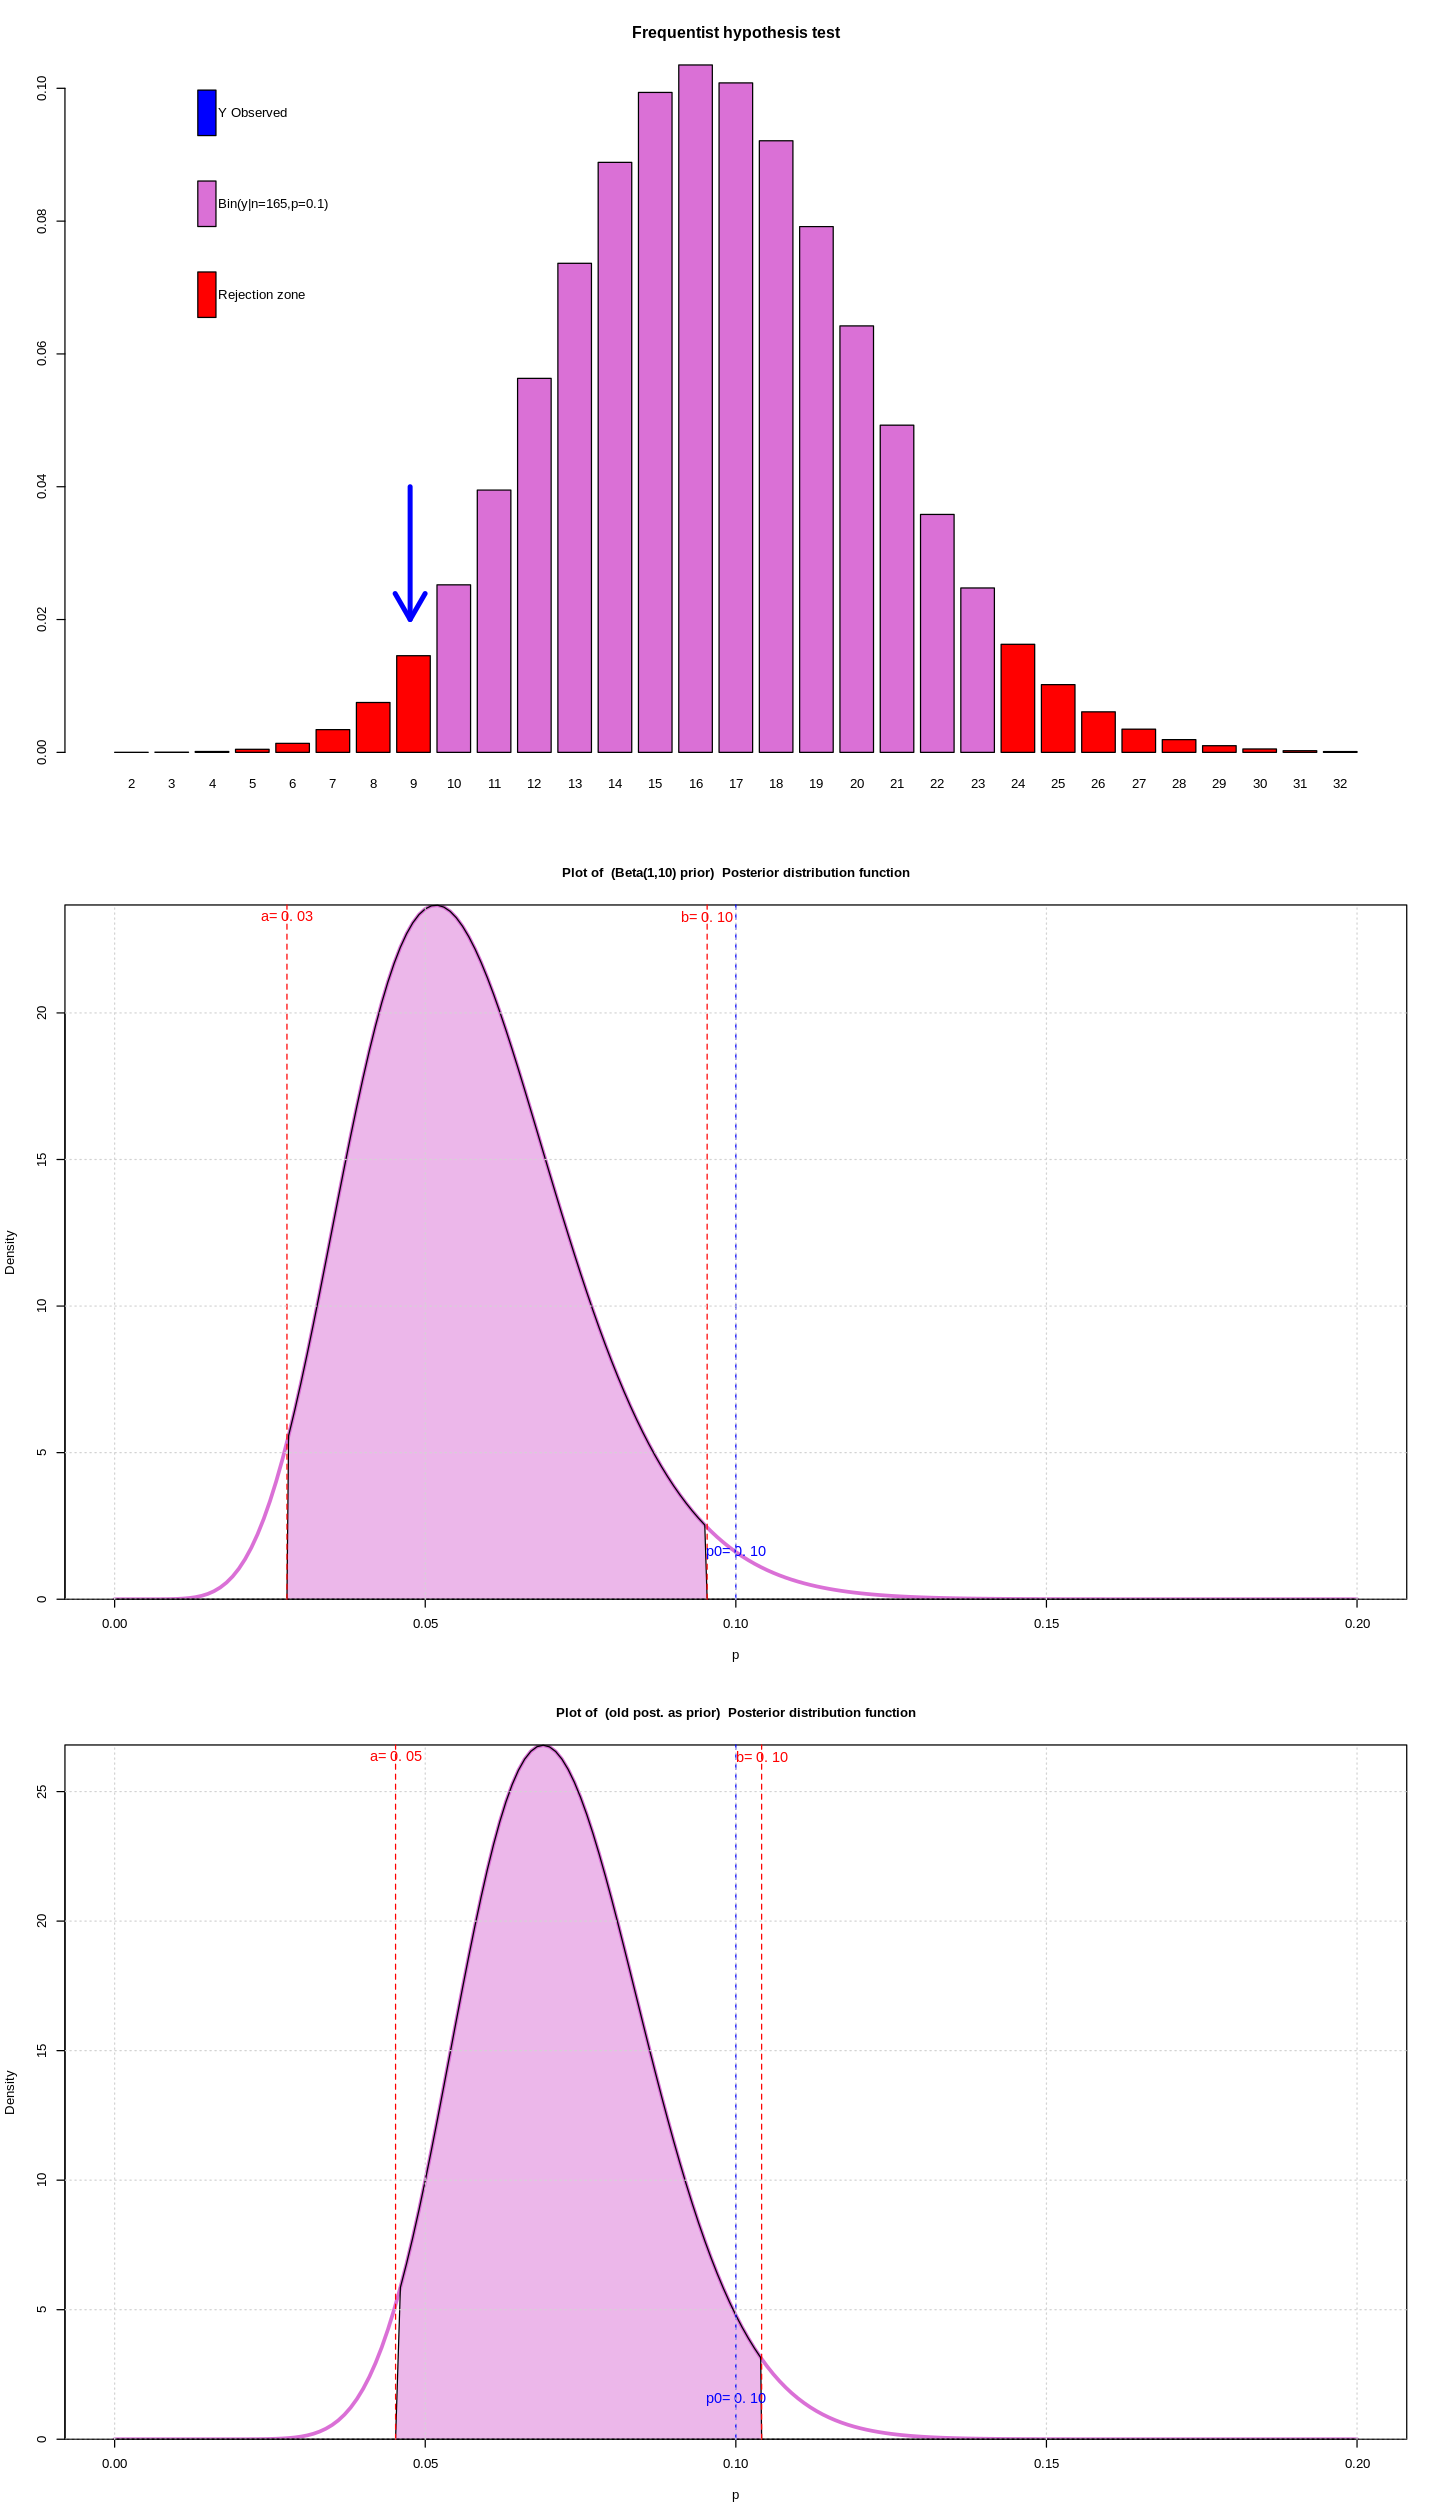

In [17]:
conf<-0.05; p0<- 0.1

rej_l<- qbinom(conf/2.,Nn , p0)
rej_r<- qbinom(1-conf/2., Nn, p0)

## frequentist approach: two tailed test
#visualization:
plot_max <- 32
columns2 <- rep('orchid', plot_max+1)
columns2 <- replace(columns2, c(seq(2, rej_l-1,1), seq(rej_r-1, plot_max+1)), 'red')

options(repr.plot.width=12, repr.plot.height=21)
par(mfrow=c(3,1)) 

yss <- seq(2,plot_max,1)
barplot(dbinom(yss, Nn, p0), names.arg=yss,
        col=columns2, angle=60,
        main='Frequentist hypothesis test')

arrows(rej_l,0.04,rej_l,0.02,col='blue',lw=4)

legend(2,0.11, legend=c("Y Observed", "Bin(y|n=165,p=0.1)", "Rejection zone"),
       bty='n', fill=c('blue', 'orchid', 'red'), x.intersp=0.1 )


##bayesian approach
x <- seq(0,0.2,0.001)

plot_CI(x,unlist(b110[1]),unlist(b110[2]), p0,"(Beta(1,10) prior)",c("orchid","red"),bayes = TRUE,xlab="p")
plot_CI(x,unlist(bop[1]),unlist(bop[2]), p0,"(old post. as prior)",c("orchid","red"),bayes = TRUE,xlab="p")



In the barplot we see that in the frequentist case we have enough evidence to reject the null hypothesis, therefore accept $H_1$<br>

In the bayesian scenario we see two different outcome.
When we choose Beta(1,10) as initial prior we reject the null hypothesis at a 5% level of significance. However when we apply the old measurement's posterior as prior of the new one, we can no more do that. Ergo we accept $H_0$ at 5% level of significance.